In [11]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
import matplotlib.pyplot as plt

## Loading dataset

In [6]:
data_dir = 'Input'
img_height = 256
img_width = 256
batch = 32
val_split = 0.2

In [7]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset='training',
    seed=123,
    batch_size=batch,
    image_size=(img_height, img_width)
)

Found 240 files belonging to 2 classes.
Using 192 files for training.


In [8]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split= val_split,
    subset='validation',
    seed=123,
    batch_size=batch,
    image_size=(img_height, img_width)
)

Found 240 files belonging to 2 classes.
Using 48 files for validation.


In [9]:
for image_batch, labels_batch in train_dataset.take(1):
    print(f'Shape of one image batch: {image_batch.shape}')
    print(f'Shape of one label batch: {labels_batch.shape}')

Shape of one image batch: (32, 256, 256, 3)
Shape of one label batch: (32,)


In [ ]:
# Autotune = tf.data.AUTOTUNE
# train_dataset = train_dataset.cache().prefetch(buffer_size=Autotune)
# validation_dataset = validation_dataset.cache().prefetch(buffer_size=Autotune)

## Data Augmentation - creating a preprocessing layer

In [13]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
], name="data_augmentation_layer")

Sanity Check

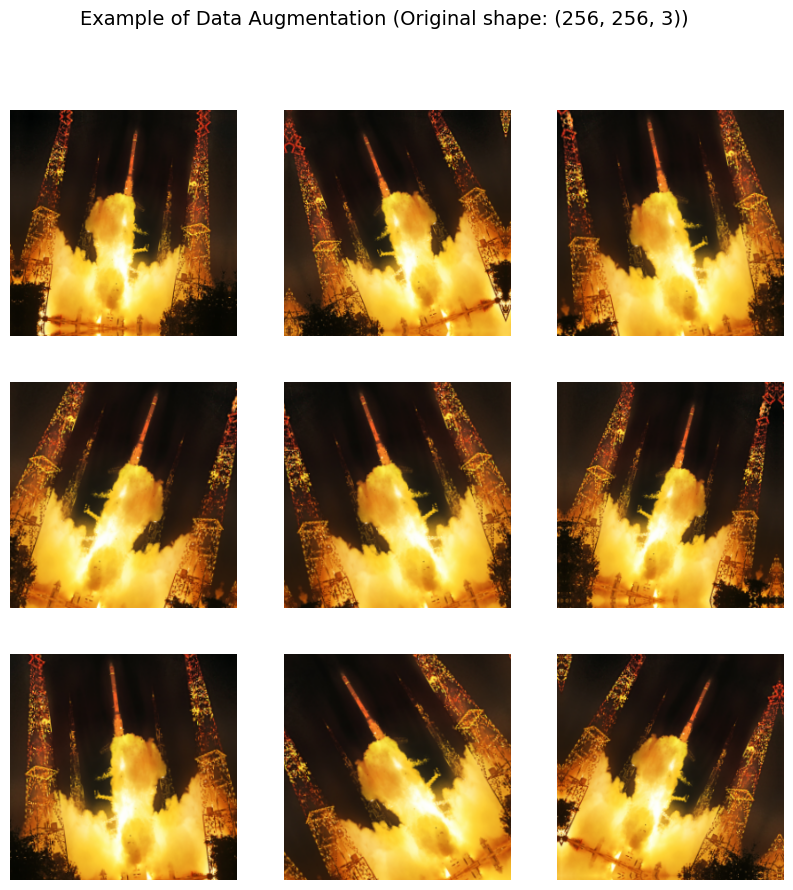

In [16]:
for images, _ in train_dataset.take(1):
    plt.figure(figsize=(10,10))
    first_image=images[0]

    plt.suptitle(f'Example of Data Augmentation (Original shape: {first_image.shape})', fontsize=14)
    for i in range(1,10):
        ax = plt.subplot(3,3,i)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()
    break

## Model Building

In [ ]:
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

rocket_model = Sequential([
    # Rescaling layer
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    # Data Augmentation layer
    data_augmentation,

    # <---Convolutional base---> 
    # Block 1 - 16 filters
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    # Block 2 - 32 filters
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    # Block 3 - 64 filters
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Dropout(0.2),

    # Classification head
    Flatten(),

    Dense(128, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid')
])

rocket_model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, 256, 256, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,449 (32.09 MB)

 Trainable params: 8,412,449 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

## Model compilation

In [18]:
rocket_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Model training

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 20

earlystopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights = True
)

history = rocket_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs=EPOCHS,
    callbacks=[earlystopping]
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9896 - loss: 0.0370 - val_accuracy: 0.9792 - val_loss: 0.0176
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9948 - loss: 0.0096 - val_accuracy: 0.9792 - val_loss: 0.0791
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9792 - val_loss: 0.0189
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 9.1542e-04 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 2.1268e-04 - val_accuracy: 1.0000 - val_loss: 9.0476e-04
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 1.0231e-04 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 1.9543e-04 - val_accuracy: 0.9583 - val_loss: 0.

## Model Evaluation

In [22]:
loss, accuracy = rocket_model.evaluate(validation_dataset)
print(f'Validation Loss (with best weights): {loss:.4f}')
print(f'Validation accuracy (with best weights): {accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 1.0000 - loss: 9.0476e-04
Validation Loss (with best weights): 0.0009
Validation accuracy (with best weights): 100.00%


## Visualization of training

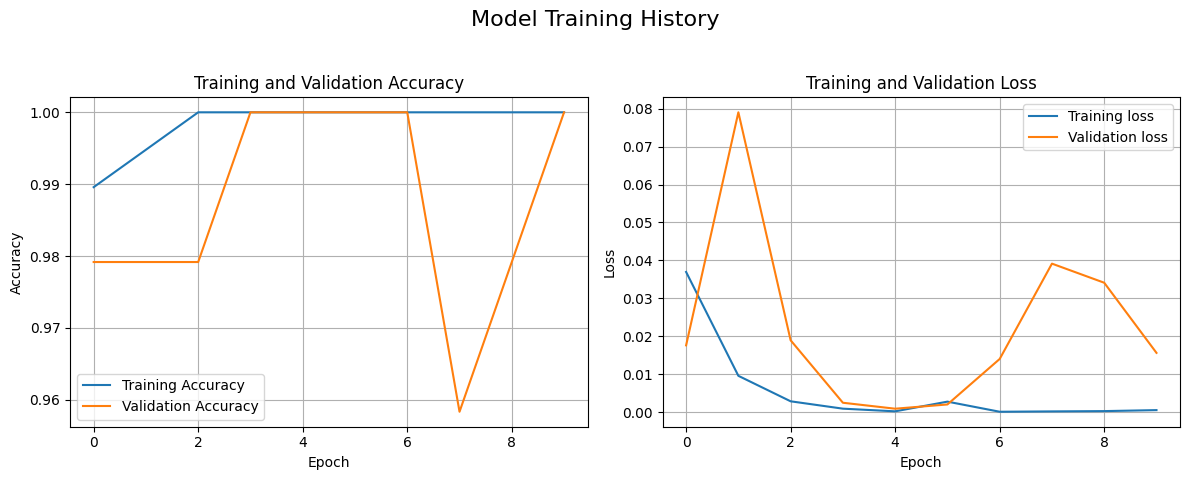

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))
plt.suptitle('Model Training History', fontsize=16)

# Accuracy curve
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.grid(True)

# Loss curve
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Testing 

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

CLASS_NAMES = ['Day', 'Night']

def classify_new_image(model, path_to_new_image):
    try:
        img = image.load_img(
            path_to_new_image,
            target_size=(img_height, img_width)
        )
    except FileNotFoundError:
        return f'Error: Image file not found at path: {path_to_new_image}'
    
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    predictions = rocket_model.predict(img_array)

    probability = predictions[0][0]

    if probability > 0.5:
        predicted_class_index = 1
        confidence = probability
    else:
        predicted_class_index = 0
        confidence = 1.0 - probability

    predicted_class = CLASS_NAMES[predicted_class_index]

    return (
        f'<--- Prediction result--->\n'
        f'Image: {path_to_new_image}\n'
        f'Raw probability (Night): {probability:.4f}\n'
        f'Predicted Class: **{predicted_class.upper()}**\n'
        f'Confidence: **{confidence*100:.2f}**\n'
    )

In [33]:
path_to_new_image = 'test4.jpeg'

prediction_output = classify_new_image(rocket_model, path_to_new_image)
print(prediction_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
<--- Prediction result--->
Image: test4.jpeg
Raw probability (Night): 1.0000
Predicted Class: **NIGHT**
Confidence: **100.00**

